In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [148]:
df=pd.read_csv("Loan_Predication.csv")
df.shape

(614, 13)

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [150]:
df=pd.read_csv("Loan_Predication.csv")
df.shape

(614, 13)

In [151]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#EDA

In [153]:
df["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


In [154]:
df["Gender"].value_counts()

,count
Gender,
Male,489
Female,112


In [155]:
df["Married"].value_counts()

,count
Married,
Yes,398
No,213


In [156]:
df["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


3+ will cause an issue so we will trat this column as a categorical

<Axes: xlabel='Education'>

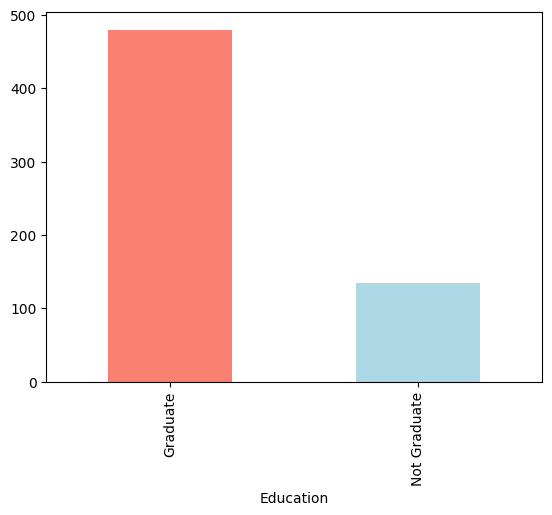

In [157]:
df.Education.value_counts().plot(kind="bar",color=["salmon","lightblue"])

<Axes: xlabel='Self_Employed'>

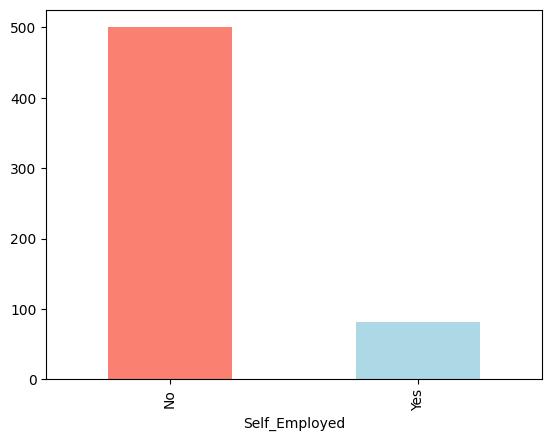

In [158]:
df.Self_Employed.value_counts().plot(kind="bar",color=["salmon","lightblue"])

<Axes: ylabel='Frequency'>

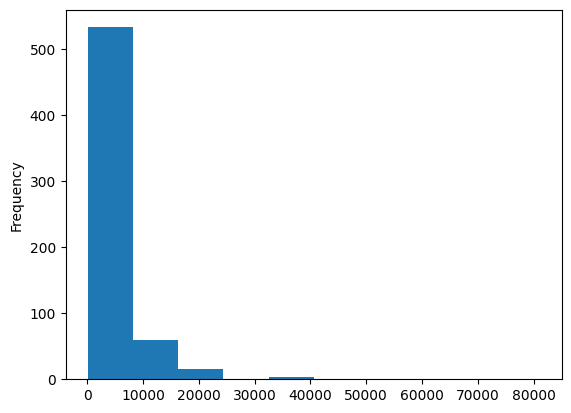

In [159]:
df.ApplicantIncome.plot(kind="hist")

<Axes: ylabel='Frequency'>

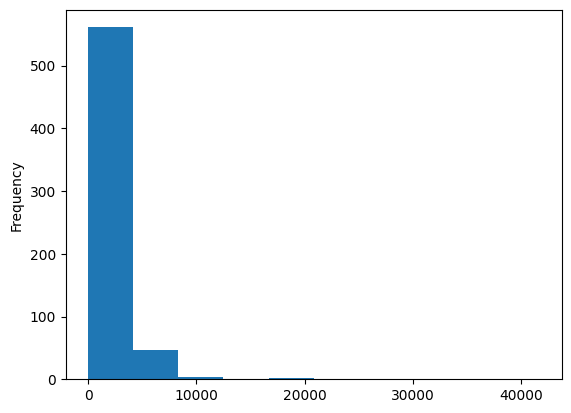

In [160]:
df.CoapplicantIncome.plot(kind="hist")

In [161]:
df["LoanAmount"].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
187.0,12
160.0,12
...,...
292.0,1
142.0,1
350.0,1


<Axes: ylabel='Frequency'>

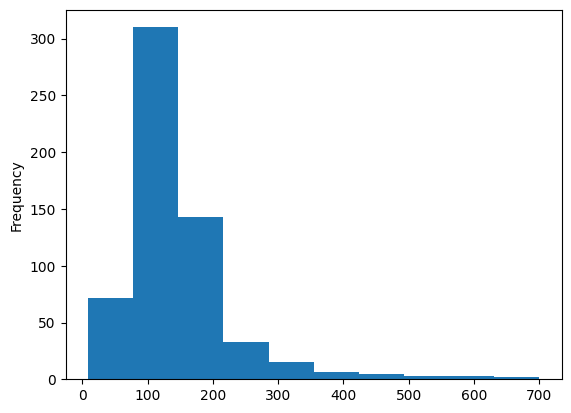

In [162]:
df.LoanAmount.plot(kind="hist")

In [163]:
df["Loan_Amount_Term"].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [164]:
df["Credit_History"].value_counts()

,count
Credit_History,
1.0,475
0.0,89


<Axes: xlabel='Property_Area'>

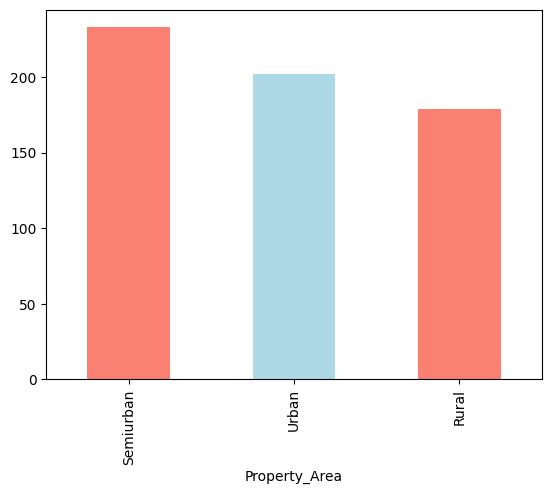

In [165]:
df.Property_Area.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [166]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


what i will do to process the data

drop id

convert gender married education Self_Employed Loan_Status to int

Property_Area dependents one hot encode

gender married Credit_History Loan_Amount_Term Self_Employed replace any missing with mode

LoanAmount ApplicantIncome replace any missing with mean

LoanAmount ApplicantIncome sclae from 0 to 1

In [167]:
pd.crosstab(index=df.Loan_Status, columns=df.Credit_History)

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


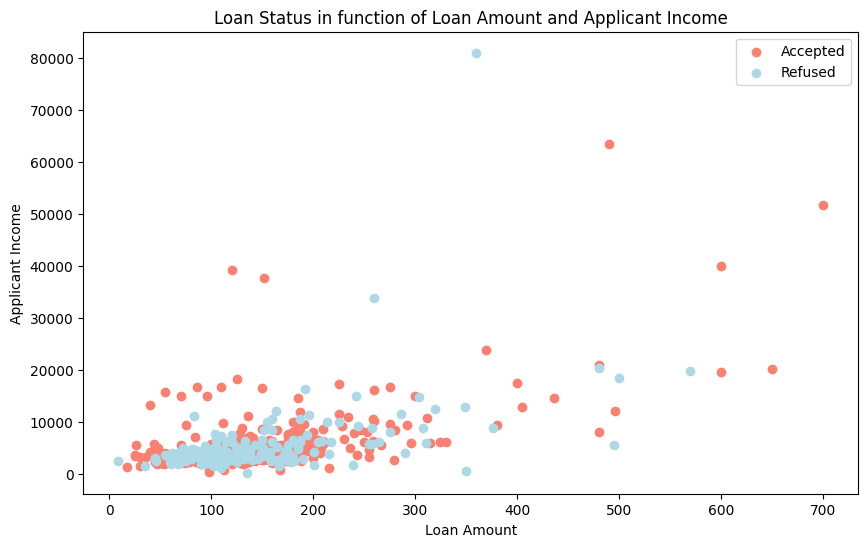

In [168]:
plt.figure(figsize=(10,6))

plt.scatter(df.LoanAmount[df.Loan_Status=="Y"],df.ApplicantIncome[df.Loan_Status=="Y"],c="salmon")
plt.scatter(df.LoanAmount[df.Loan_Status=="N"],df.ApplicantIncome[df.Loan_Status=="N"],c="lightblue")

plt.title("Loan Status in function of Loan Amount and Applicant Income")
plt.xlabel("Loan Amount")
plt.legend(["Accepted", "Refused"])
plt.ylabel("Applicant Income");

In [169]:
df[df["ApplicantIncome"] == 81000]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


I will drop this row as it might confuse the model

update removing this row decrease the accuracy

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [171]:
# df = df.drop(df[df["ApplicantIncome"] == 81000].index)
df=df.drop("Loan_ID",axis=1)

In [172]:
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

In [173]:
#combine two column in one columns
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [174]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [175]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,7583.0


In [176]:
# 1. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
# 2. Define columns
# Columns to scale + impute numerically (mean)
num_cols = ['TotalIncome', 'LoanAmount']

# Columns to scale + impute numerically (mode)
num_cols_discrete = ['Loan_Amount_Term']

# Columns to encode + impute
cat_cols = ['Dependents', 'Property_Area']

#columns to map + impute
map_cols = ['Gender', 'Married', 'Education', 'Self_Employed']

# Columns to impute only
impute_only_cols = ['Credit_History']

# Pipelines

# Numeric pipeline → Impute mean → Scale
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Numeric pipeline → Impute mode → Scale
discrete_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Categorical pipeline → Impute mode → OneHot
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#  Mapping Pipeline + Impute mode
mapping_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[
        ['Female', 'Male'],            # Gender
        ['No', 'Yes'],                 # Married
        ['Not Graduate', 'Graduate'],  # Education
        ['No', 'Yes']                  # Self_Employed
    ]))
])

# Impute-only pipeline
impute_only_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_cols),
        ('num_discrete', discrete_pipeline, num_cols_discrete),
        ('cat', categorical_pipeline, cat_cols),
        ('map', mapping_pipeline, map_cols),
        ('impute_only', impute_only_pipeline, impute_only_cols)
    ])

# 4. Pipeline with model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# 5. Fit
pipeline.fit(X_train)
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [178]:
# Get feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)
X_train_df


,num__TotalIncome,num__LoanAmount,num_discrete__Loan_Amount_Term,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,map__Gender,map__Married,map__Education,map__Self_Employed,impute_only__Credit_History
0,-0.362477,0.403497,0.304375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,-0.218753,0.096141,0.304375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,-0.445291,-0.152107,0.304375,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.440335,-0.471284,0.304375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-0.043373,-0.199393,0.304375,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-0.528265,-0.589498,0.304375,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
425,0.877489,0.923637,0.304375,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
426,-0.610279,-1.381530,0.304375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
427,0.478448,0.000000,-1.455421,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [179]:
train_corr_df = X_train_df.copy()
train_corr_df['Loan_Status'] = y_train.values
corr_matrix = train_corr_df.corr()
corr_matrix

,num__TotalIncome,num__LoanAmount,num_discrete__Loan_Amount_Term,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,map__Gender,map__Married,map__Education,map__Self_Employed,impute_only__Credit_History,Loan_Status
num__TotalIncome,1.000000,0.583630,0.015325,-0.101490,0.012141,0.000641,0.164292,0.041421,-0.046412,0.008445,0.114435,0.125594,0.163494,0.158478,-0.025519,-0.031625
num__LoanAmount,0.583630,1.000000,0.091038,-0.159186,0.080318,0.033393,0.131610,0.047373,-0.044667,0.000988,0.089041,0.150550,0.184305,0.163836,0.021871,-0.003852
num_discrete__Loan_Amount_Term,0.015325,0.091038,1.000000,0.145228,-0.146501,-0.023540,-0.029168,0.024266,0.032365,-0.056409,-0.108840,-0.139335,0.111328,-0.036867,-0.016293,0.011089
cat__Dependents_0,-0.101490,-0.159186,0.145228,1.000000,-0.548952,-0.516545,-0.364324,0.043571,0.060163,-0.103398,-0.139977,-0.329564,-0.001015,-0.087625,0.012946,-0.019988
cat__Dependents_1,0.012141,0.080318,-0.146501,-0.548952,1.000000,-0.189775,-0.133850,-0.113111,0.003945,0.103451,-0.029898,0.116206,-0.000840,0.074215,-0.016726,-0.064016
cat__Dependents_2,0.000641,0.033393,-0.023540,-0.516545,-0.189775,1.000000,-0.125948,-0.031601,-0.040089,0.071339,0.142981,0.233543,0.021825,0.038897,0.020448,0.060417
cat__Dependents_3+,0.164292,0.131610,-0.029168,-0.364324,-0.133850,-0.125948,1.000000,0.117810,-0.060590,-0.049560,0.104148,0.125488,-0.025624,0.004611,-0.027127,0.044048
cat__Property_Area_Rural,0.041421,0.047373,0.024266,0.043571,-0.113111,-0.031601,0.117810,1.000000,-0.492665,-0.442966,0.111193,0.011100,-0.067870,0.037644,-0.018218,-0.096416
cat__Property_Area_Semiurban,-0.046412,-0.044667,0.032365,0.060163,0.003945,-0.040089,-0.060590,-0.492665,1.000000,-0.561951,-0.165326,-0.060134,0.063910,0.018192,0.097762,0.187306
cat__Property_Area_Urban,0.008445,0.000988,-0.056409,-0.103398,0.103451,0.071339,-0.049560,-0.442966,-0.561951,1.000000,0.064633,0.051401,-0.001330,-0.054524,-0.083401,-0.101325


<Axes: >

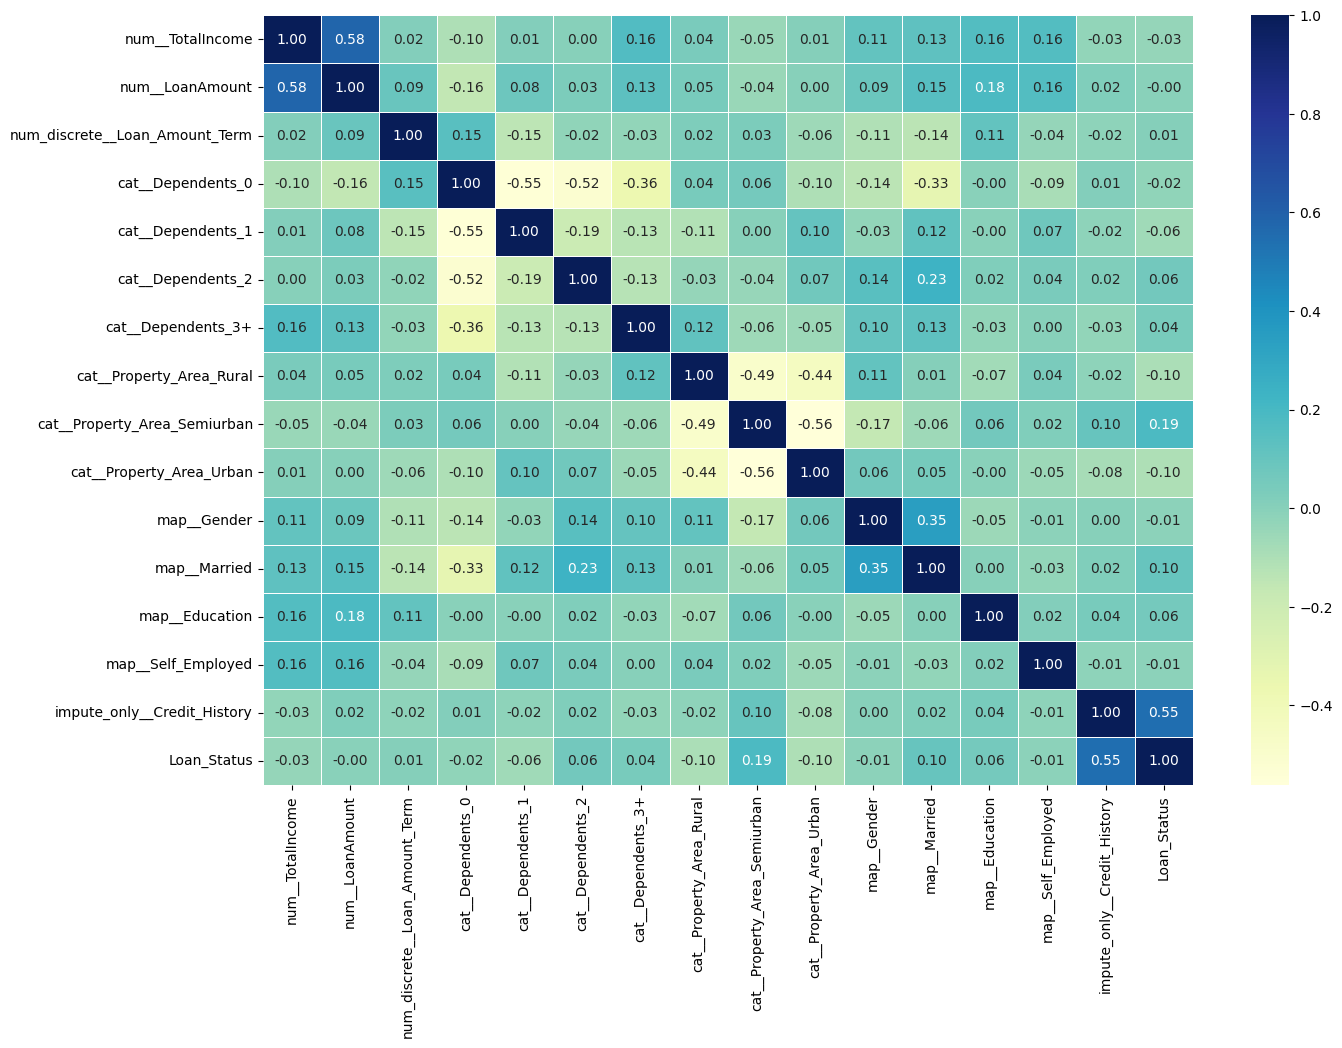

In [180]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt= ".2f",
           cmap="YlGnBu")

## 1. Feature Importance with Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_processed, y_train)  # only fitting to get importance scores

RandomForestClassifier(random_state=42)

In [182]:
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n=== Random Forest Feature Importances ===")
print(feature_importances)


=== Random Forest Feature Importances ===
                           Feature  Importance
0                 num__TotalIncome    0.249244
14     impute_only__Credit_History    0.249068
1                  num__LoanAmount    0.216613
2   num_discrete__Loan_Amount_Term    0.051895
11                    map__Married    0.033699
12                  map__Education    0.028069
10                     map__Gender    0.026302
8     cat__Property_Area_Semiurban    0.025066
13              map__Self_Employed    0.020508
7         cat__Property_Area_Rural    0.020027
3                cat__Dependents_0    0.019471
4                cat__Dependents_1    0.018970
9         cat__Property_Area_Urban    0.017796
5                cat__Dependents_2    0.014451
6               cat__Dependents_3+    0.008822


In [183]:
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

# Using Logistic Regression here just for ranking purposes
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=13)  # How many features to keep
rfe.fit(X_train_processed, y_train)

# Get the mask of selected features
selected_features_rfe = feature_names[rfe.support_]
print("\n=== RFE Selected Features ===")
print(selected_features_rfe)


=== RFE Selected Features ===
['num__TotalIncome' 'num_discrete__Loan_Amount_Term' 'cat__Dependents_0'
 'cat__Dependents_1' 'cat__Dependents_2' 'cat__Dependents_3+'
 'cat__Property_Area_Rural' 'cat__Property_Area_Semiurban'
 'cat__Property_Area_Urban' 'map__Gender' 'map__Married' 'map__Education'
 'impute_only__Credit_History']


In [184]:
from sklearn.preprocessing import MinMaxScaler
# Chi-square works only with non-negative features and we used standard scale so i will scale it to minmaxscalar

X_chi = X_train_processed.copy()
# MinMax scale to [0,1] so Chi-square works
scaler = MinMaxScaler()
X_chi_scaled = scaler.fit_transform(X_chi)

# Chi-square test
chi_scores, p_values = chi2(X_chi_scaled, y_train)

# Put into a dataframe with feature names
chi2_df = pd.DataFrame({
    'Feature': feature_names,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_df)

                           Feature  Chi2 Score   p-value
14     impute_only__Credit_History   18.032033  0.000022
8     cat__Property_Area_Semiurban    9.262095  0.002339
9         cat__Property_Area_Urban    2.926031  0.087162
7         cat__Property_Area_Rural    2.872472  0.090106
11                    map__Married    1.561264  0.211480
4                cat__Dependents_1    1.463016  0.226451
5                cat__Dependents_2    1.328675  0.249041
6               cat__Dependents_3+    0.764434  0.381944
12                  map__Education    0.341638  0.558885
3                cat__Dependents_0    0.068716  0.793216
0                 num__TotalIncome    0.037598  0.846253
13              map__Self_Employed    0.023174  0.879004
10                     map__Gender    0.010458  0.918546
2   num_discrete__Loan_Amount_Term    0.001602  0.968078
1                  num__LoanAmount    0.000513  0.981922


After tring all of these tests to feature selection it is not clear to remove any feature  

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [186]:
model=LogisticRegression(penalty='l2',max_iter=10000,random_state=42)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7837837837837838

In [187]:
model=LogisticRegression(penalty='l1',max_iter=10000,random_state=42,solver='saga')
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7837837837837838

In [188]:
model=DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=8)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7405405405405405

In [189]:
model=DecisionTreeClassifier(criterion='entropy',random_state=42,min_samples_leaf=5,max_depth=10)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.745945945945946

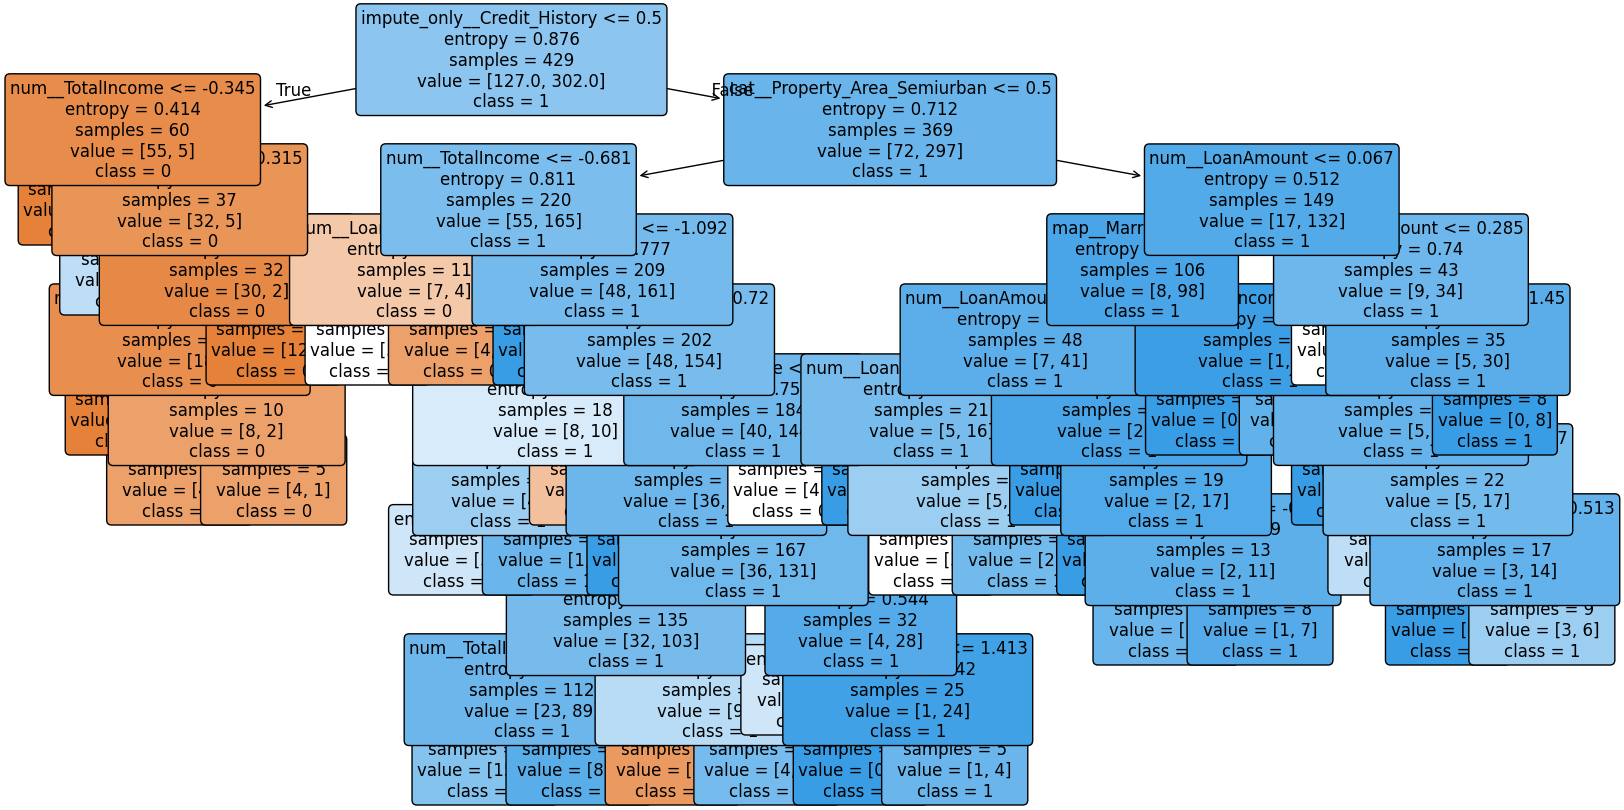

In [190]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=feature_names,
          class_names=['0', '1'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

In [191]:
model=RandomForestClassifier(n_estimators=800,max_depth=10,random_state=42)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.8

In [192]:
model=AdaBoostClassifier(random_state=42)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7891891891891892

Now i will start using GridSearch

In [195]:
from sklearn.model_selection import GridSearchCV


# Different LogisticRegression hyperparameters
log_reg_grid = [
    # liblinear works with l1 and l2
    {
        "C": np.logspace(-4, 4, 20),
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"],
        "max_iter": [100, 500, 1000],
        "random_state": [42]
    },
    # saga works with l1, l2, elasticnet
    {
        "C": np.logspace(-4, 4, 20),
        "solver": ["saga"],
        "penalty": ["l1", "l2", "elasticnet"],
        "l1_ratio": [0.2,0.4,0.6,0.8],  # only used if elasticnet
        "max_iter": [100, 500, 1000],
        "random_state": [42]
    }
]



# Different DecisionTree hyperparameters
dtree_grid={"criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 3, 5, 10, 20],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            "max_features": [None, "sqrt", "log2"],
            "splitter": ["best", "random"],
            "random_state": [42]}


# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": [100,300,500,800,1100],
           "max_depth": [None, 5, 10],
           "min_samples_split": [2,5,10],
           "min_samples_leaf": [1,2,4],
           "max_features": ["sqrt", "log2"],
           "bootstrap": [True],
           "random_state": [42]}

# Different AdaBoostClassifier hyperparameters
adaboost_grid = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ],
    "algorithm": ["SAMME", "SAMME.R"],
    "random_state": [42]
}

In [196]:
logreg_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data
logreg_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(logreg_search.best_params_)
print(logreg_search.best_score_)

{'C': np.float64(0.012742749857031334), 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
0.8204651162790698


In [197]:
dt_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data

dt_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(dt_search.best_params_)
print(dt_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'random_state': 42, 'splitter': 'best'}
0.8321203830369358


In [198]:
rf_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data
rf_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(rf_search.best_params_)
print(rf_search.best_score_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800, 'random_state': 42}
0.8251436388508893


In [199]:
adaboost_search = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=adaboost_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data
adaboost_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(adaboost_search.best_params_)
print(adaboost_search.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

{'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42}
0.8274965800273598


In [200]:
model_1=LogisticRegression(C=np.float64(0.012742749857031334),
                           solver="liblinear",
                           random_state=42,
                           max_iter=100,
                           penalty="l1"
                           )
model_1.fit(X_train_processed,y_train)


model_2=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 3,
 max_features= None,
 min_samples_leaf= np.int64(1),
 min_samples_split= np.int64(2),
 random_state= 42,
 splitter= 'best')
model_2.fit(X_train_processed,y_train)


model_3=RandomForestClassifier(n_estimators=800,
                               random_state=42,
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               max_features="sqrt",
                               bootstrap=True)
model_3.fit(X_train_processed,y_train)


model_4=AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=3),
    algorithm="SAMME",
    random_state=42
)
model_4.fit(X_train_processed,y_train)


models={"model_1": [model_1,X_test_processed],
       "model_2": [model_2,X_test_processed],
       "model_3": [model_3,X_test_processed],
       "model_4": [model_4,X_test_processed]}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [201]:
def fit_and_score(models,y_test):
    np.random.seed(42)
    results=[]

    for model_name,(model, X_test) in models.items():
            y_pred = model.predict(X_test)

            results.append({
                "Model": model_name,
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "f1": f1_score(y_test, y_pred),
                "AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
            })
    df_scores = pd.DataFrame(results)
    return df_scores

In [202]:
df_scores = fit_and_score(models=models,
                             y_test=y_test)
df_scores

,Model,accuracy,precision,recall,f1,AUC
0,model_1,0.783784,0.756410,0.983333,0.855072,0.699359
1,model_2,0.783784,0.756410,0.983333,0.855072,0.712244
2,model_3,0.800000,0.771242,0.983333,0.864469,0.793462
3,model_4,0.783784,0.756410,0.983333,0.855072,0.719936


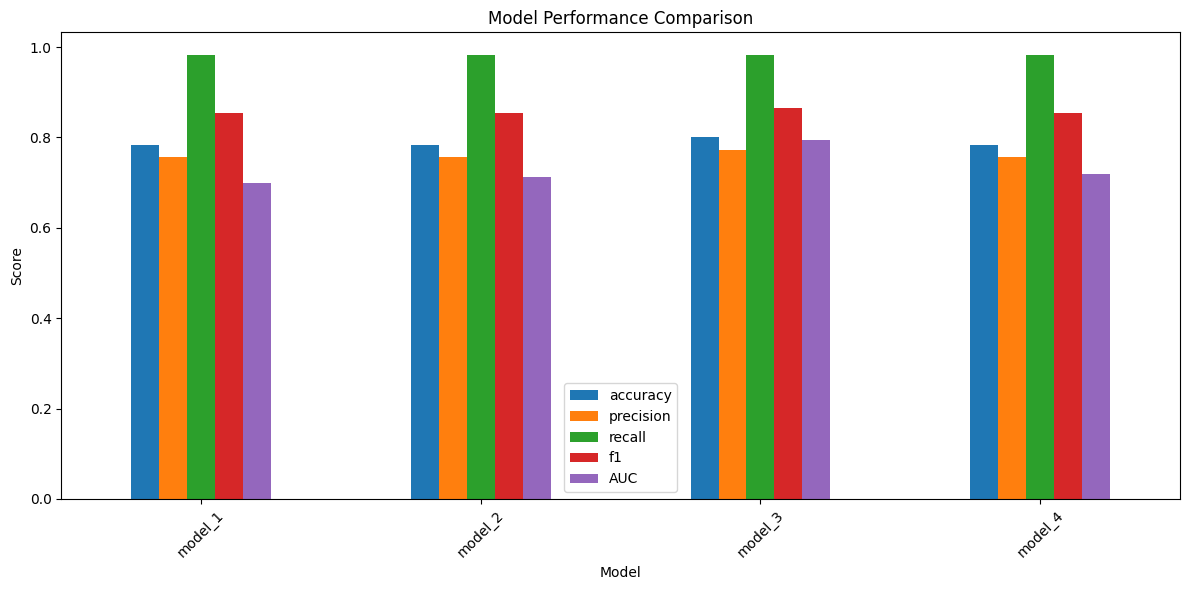

In [203]:
df_scores.set_index("Model")[["accuracy", "precision", "recall", "f1", "AUC"]].plot(
    kind="bar",
    figsize=(12,6),
    xlabel="Model",
    ylabel="Score",
    title="Model Performance Comparison"
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The best model is clearly model 3

# Part 1: Effect of Regularization & Hyperparameter Tuning

Grid search tuning transformed models from overfitting to robust generalization through specific regularization techniques.

### 1. Logistic Regression (The "Lasso" Effect)
* **Tuning:** Strong L1 regularization (`penalty='l1'`, small `C=0.0127`).
* **Effect:** Acted as **feature selection** by shrinking non-critical coefficients to zero. This filtered out noise and outliers, focusing the model solely on strong predictors like `Credit_History`.

### 2. Decision Tree (The "Pruning" Effect)
* **Tuning:** Shallow depth (`max_depth=3`).
* **Effect:** **Pruning** prevented the tree from memorizing training data. It forced the model to learn broader, critical rules rather than specific data points, reducing variance.

### 3. Random Forest (The "Stability" Effect)
* **Tuning:** High tree count (`n_estimators=800`).
* **Effect:** **Ensemble averaging** smoothed out individual errors and outliers. This structure acts as intrinsic regularization, creating a highly stable model.

### 4. AdaBoost (The "Slow Learning" Effect)
* **Tuning:** Low `learning_rate` (0.01) with 100 estimators.
* **Effect:** **Soft boosting** allowed the model to learn in tiny, incremental steps. This prevented it from overreacting to single hard-to-classify data points (outliers).

---

# Part 2: When is Logistic Regression Preferable?

Despite the power of tree-based models, Logistic Regression is superior in specific contexts:

* **Interpretability:** Essential when you need to explain the exact impact (odds) of each feature.
* **Linearity:** Best when features share a direct linear relationship with the target.
* **High Sparsity:** L1 regularization handles high-dimensional sparse data (e.g., from extensive One-Hot Encoding) more efficiently than trees.
* **Latency:** Computationally instant for training and prediction, making it ideal for real-time systems.